In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.metrics import root_mean_squared_error
from seaborn import regplot
import scipy.stats as stats

### Load Data

In [23]:
cases = pd.read_csv('./data/covid_cases_weekly', index_col=0)
deaths = pd.read_csv('./data/covid_deaths_weekly', index_col=0)

# First task: create linear and non-linear models to predict the number of new cases and deaths in Florida

In [24]:
state = 'FL'

In [25]:
florida_cases = cases[cases['State'] == state].drop(columns=['State', 'StateFIPS'])
florida_deaths = deaths[deaths['State'] == state].drop(columns=['State', 'StateFIPS'])
florida_cases = florida_cases.iloc[1:]
florida_deaths = florida_deaths.iloc[1:]

In [26]:
florida_case_sums = florida_cases[florida_cases.columns[3:]].sum()
florida_death_sums = florida_deaths[florida_deaths.columns[3:]].sum()
florida_new_cases = florida_case_sums.diff()[1:]
florida_new_deaths = florida_death_sums.diff()[1:]

### Linear Model

In [27]:
x = np.arange(len(florida_new_cases)) * 7
cases_linear = LinearRegression()
deaths_linear = LinearRegression()
reshape = lambda a: a.copy().reshape(-1, 1)
cases_linear.fit(reshape(x), florida_new_cases)
deaths_linear.fit(reshape(x), florida_new_deaths)

LinearRegression()

### Get Predictions and plot with 1 week prediction into the future

In [28]:
x_ext = np.arange(len(florida_new_cases) + 1) * 7
cases_pred_linear = cases_linear.predict(reshape(x))
deaths_pred_linear = deaths_linear.predict(reshape(x))

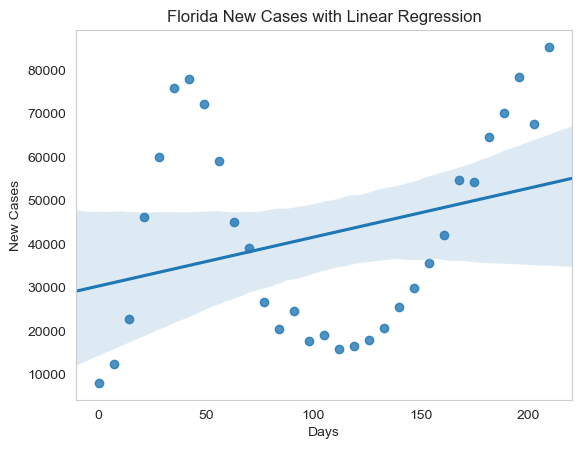

In [29]:
ax = regplot(florida_new_cases, x=x, y=florida_new_cases, label='Cases', truncate=False)
ax.set_title('Florida New Cases with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

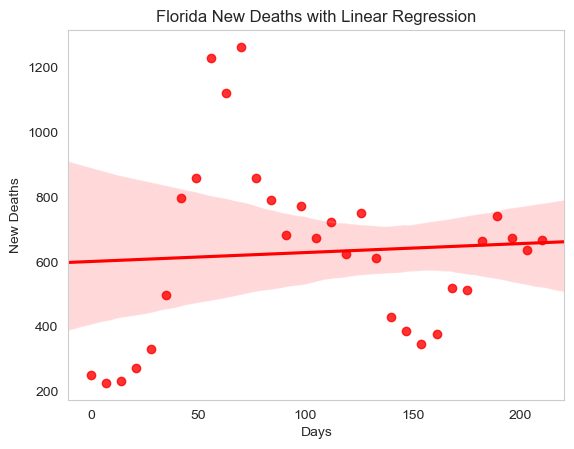

In [30]:
ax = regplot(florida_new_deaths, x=x, y=florida_new_deaths, label='Deaths', truncate=False, color='red')
ax.set_title('Florida New Deaths with Linear Regression')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Non-Linear Model - Polynomial Degree 2

In [31]:
cases_poly2 = polyfit(x, florida_new_cases, 2)
deaths_poly2 = polyfit(x, florida_new_deaths, 2)

In [32]:
cases_pred_poly2 = polyval(x, cases_poly2)
deaths_pred_poly2 = polyval(x, deaths_poly2)

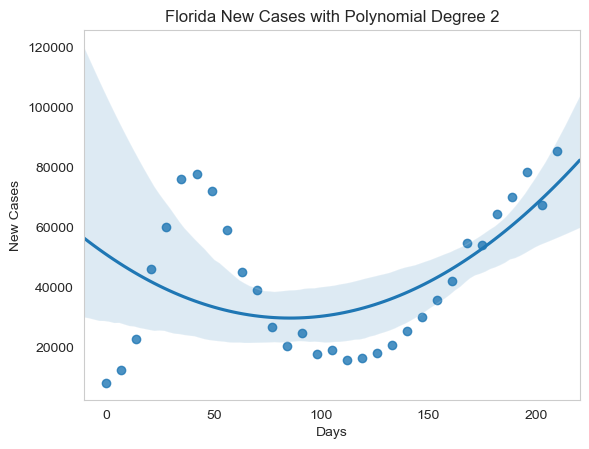

In [33]:
ax = regplot(florida_new_cases, x=x, y=florida_new_cases, order=2, label='Trendline', truncate=False)
ax.set_title('Florida New Cases with Polynomial Degree 2')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

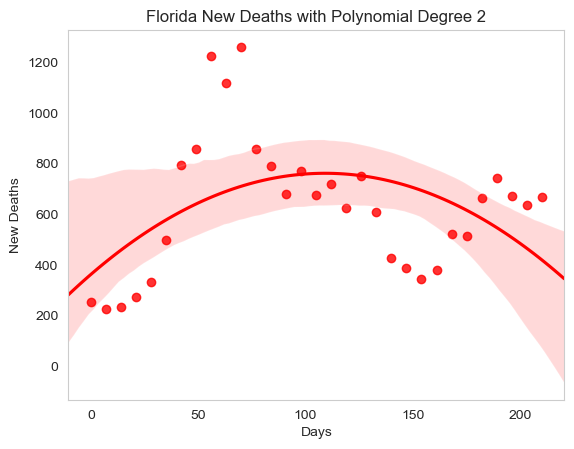

In [34]:
ax = regplot(florida_new_deaths, x=x, y=florida_new_deaths, order=2, label='Trendline', truncate=False, color='red')
ax.set_title('Florida New Deaths with Polynomial Degree 2')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Non-Linear Model - Polynomial Degree 3

In [35]:
cases_poly3 = polyfit(x, florida_new_cases, 3)
deaths_poly3 = polyfit(x, florida_new_deaths, 3)

In [36]:
cases_pred_poly3 = polyval(x, cases_poly3)
deaths_pred_poly3 = polyval(x, deaths_poly3)

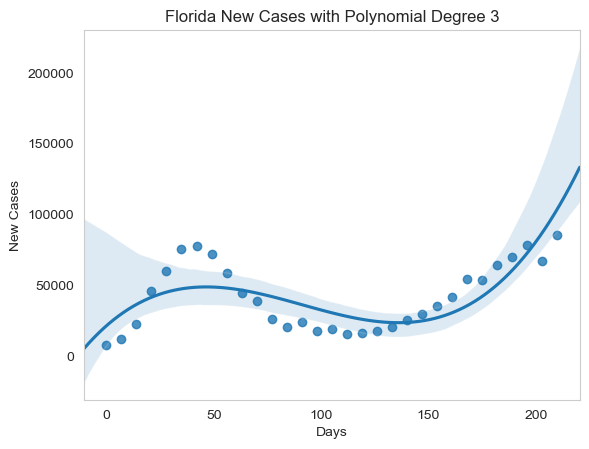

In [37]:
ax = regplot(florida_new_cases, x=x, y=florida_new_cases, order=3, label='Trendline', truncate=False)
ax.set_title('Florida New Cases with Polynomial Degree 3')
ax.set_xlabel('Days')
ax.set_ylabel('New Cases')
plt.grid()
plt.show()

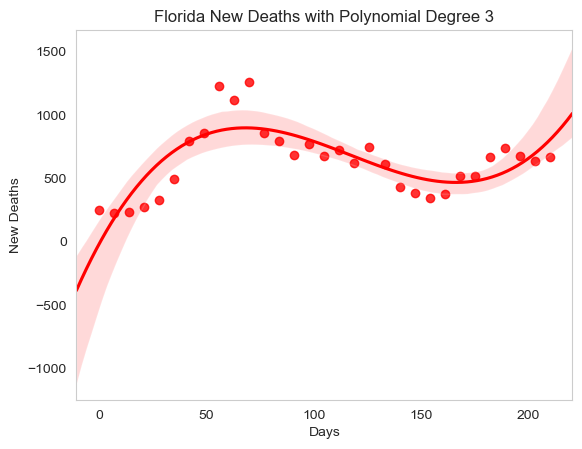

In [38]:
ax = regplot(florida_new_deaths, x=x, y=florida_new_deaths, order=3, label='Trendline', truncate=False, color='red')
ax.set_title('Florida New Deaths with Polynomial Degree 3')
ax.set_xlabel('Days')
ax.set_ylabel('New Deaths')
plt.grid()
plt.show()

### Root Mean Squared Error of Models

In [39]:
# Linear
linear_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_linear)
linear_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_linear)
# Polynomial degree 2
poly2_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_poly2)
poly2_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_poly2)
# Polynomial degree 3
poly3_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_poly3)
poly3_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_poly3)

data = {
    'Model': ['Linear', 'Polynomial Degree 2', 'Polynomial Degree 3'],
    'Cases RMSE': [linear_cases_rmse, poly2_cases_rmse, poly3_cases_rmse],
    'Deaths RMSE': [linear_deaths_rmse, poly2_deaths_rmse, poly3_deaths_rmse]
}

rmse_df = pd.DataFrame(data).set_index('Model')

rmse_df

,Cases RMSE,Deaths RMSE
Model,,
Linear,22187.631338,264.658561
Polynomial Degree 2,19740.446819,237.114555
Polynomial Degree 3,14433.191037,159.315881


# Task 2: Find the top 5 counties in Florida with the highest risk of infection and analyze the trend of cases in those counties

I choose to define the risk of infection as the percentage of the population that has been infected. This is calculated by dividing the cumulative number of infected people by the population of the county.

In [40]:
last_week = cases.columns[-1]
top_5_counties = florida_cases.sort_values(by=last_week, ascending=False).set_index('County Name').drop(columns=['countyFIPS'])
top_5_counties = top_5_counties.head(5)
top_5_counties

,population,2020-06-01 00:00:00,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,2020-07-06 00:00:00,2020-07-13 00:00:00,2020-07-20 00:00:00,2020-07-27 00:00:00,...,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00
County Name,,,,,,,,,,,,,,,,,,,,,
Miami-Dade County,2716940,18139,19756,22197,26239,35222,48992,67713,87035,107315,...,187757,194879,203654,216442,229618,245064,260138,276414,290363,305734
Broward County,1952778,7196,7924,9086,11327,15045,21856,31484,40976,50784,...,87456,91441,95734,101747,107524,114426,120840,128157,133480,141010
Palm Beach County,1496770,6135,7329,9015,10943,13711,17242,21806,26426,30958,...,53151,55816,58754,62278,65372,69331,73079,77241,80865,85479
Hillsborough County,1471968,2251,2861,3826,5973,10323,14677,19828,24135,27483,...,48925,51055,53187,55835,58293,61599,66041,70849,74788,80035
Orange County,1393452,2031,2378,3282,5157,10014,14407,18937,23584,27393,...,46986,49029,51888,55047,58325,60291,64593,69491,73691,79165


In [41]:
# log normalize cases per 100,000 based on population
top_5_counties_normalized = top_5_counties.copy()[top_5_counties.columns[1:]].div(top_5_counties['population'], axis=0) * 100000
top_5_counties_normalized = np.log1p(top_5_counties_normalized)
top_5_counties_new = top_5_counties_normalized.diff(axis=1)
top_5_counties_new = top_5_counties_new.dropna(axis=1)
top_5_counties_new

,2020-06-08 00:00:00,2020-06-15 00:00:00,2020-06-22 00:00:00,2020-06-29 00:00:00,2020-07-06 00:00:00,2020-07-13 00:00:00,2020-07-20 00:00:00,2020-07-27 00:00:00,2020-08-03 00:00:00,2020-08-10 00:00:00,...,2020-11-02 00:00:00,2020-11-09 00:00:00,2020-11-16 00:00:00,2020-11-23 00:00:00,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-14 00:00:00,2020-12-21 00:00:00,2020-12-28 00:00:00,2021-01-03 00:00:00
County Name,,,,,,,,,,,,,,,,,,,,,
Miami-Dade County,0.085271,0.116349,0.167101,0.294160,0.329769,0.323468,0.250943,0.209399,0.141605,0.077600,...,0.028268,0.037225,0.044038,0.060892,0.059087,0.065095,0.059686,0.060681,0.049227,0.051579
Broward County,0.096122,0.136524,0.220030,0.283431,0.373026,0.364731,0.263363,0.214503,0.141924,0.071935,...,0.040762,0.044548,0.045870,0.060904,0.055214,0.062203,0.054530,0.058779,0.040690,0.054871
Palm Beach County,0.177432,0.206670,0.193518,0.225223,0.228926,0.234655,0.192043,0.158200,0.109726,0.076473,...,0.044913,0.048910,0.051285,0.058235,0.048474,0.058785,0.052638,0.055378,0.045842,0.055480
Hillsborough County,0.238411,0.289357,0.444051,0.546089,0.351485,0.300553,0.196436,0.129830,0.102466,0.072203,...,0.038428,0.042602,0.040899,0.048574,0.043070,0.055150,0.069614,0.070260,0.054096,0.067794
Orange County,0.156737,0.320587,0.450364,0.662321,0.363306,0.273172,0.219306,0.149637,0.088431,0.062280,...,0.037812,0.042550,0.056660,0.059084,0.057829,0.033144,0.068908,0.073076,0.058672,0.071641


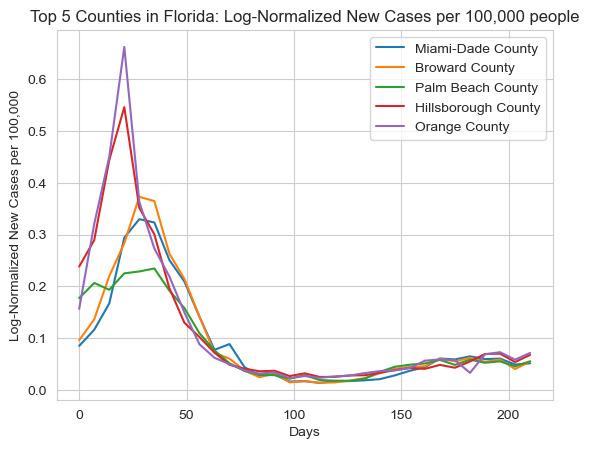

In [42]:
# first view the log-normalized cases per 100,000 people
plt.plot(x, top_5_counties_new.T)
plt.legend(top_5_counties.index)
plt.title('Top 5 Counties in Florida: Log-Normalized New Cases per 100,000 people')
plt.xlabel('Days')
plt.ylabel('Log-Normalized New Cases per 100,000')
plt.show()

### Polynomial Degree 3 Regression to Analyze Trends in Top 5 Counties

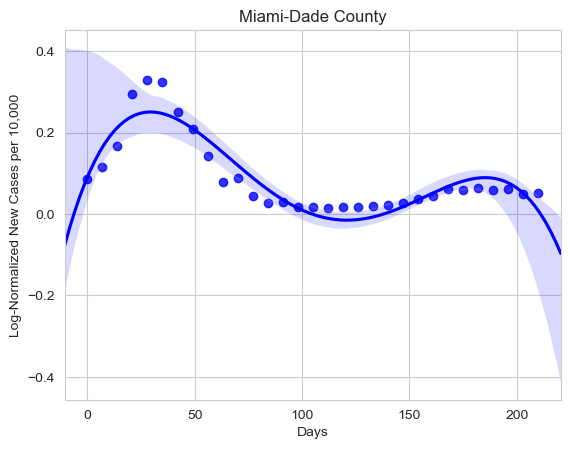

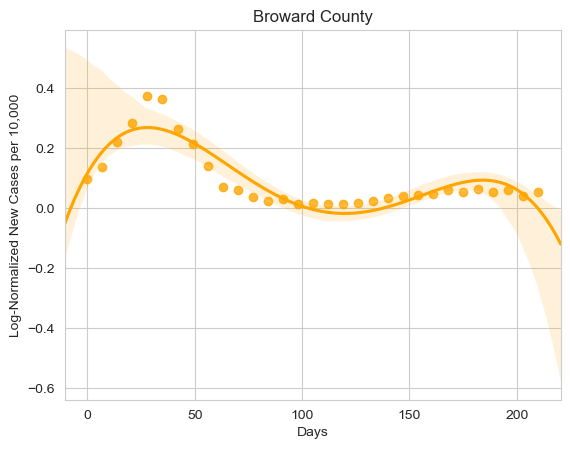

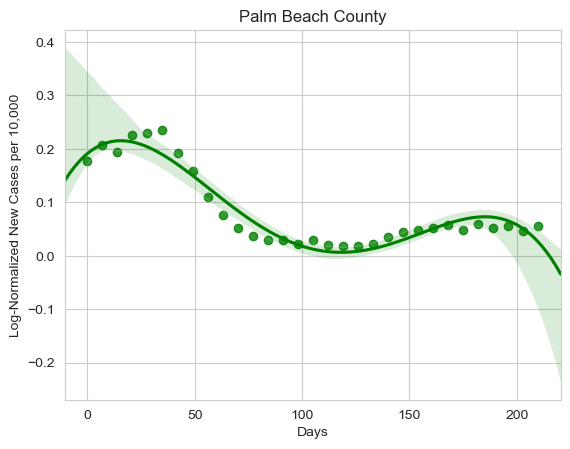

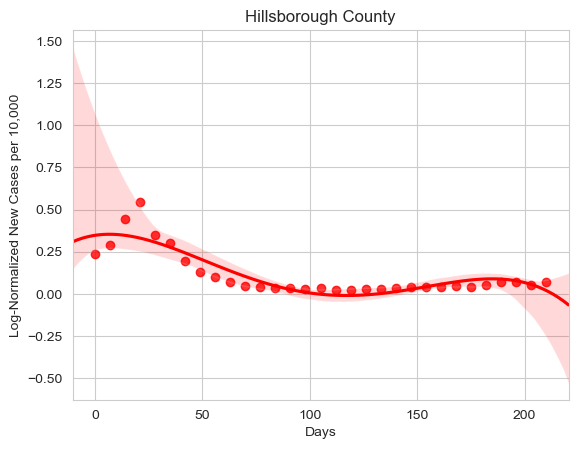

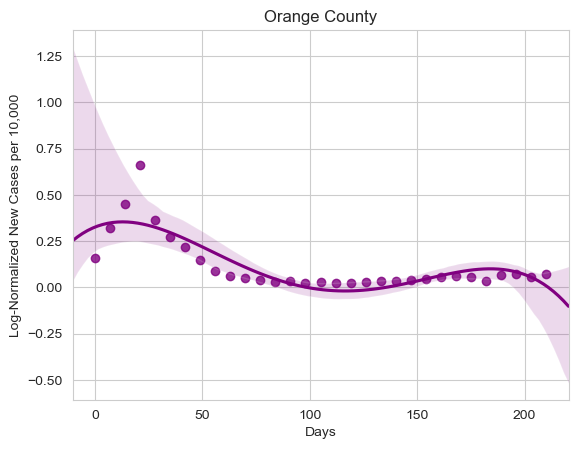

In [43]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
for county, color in zip(top_5_counties_new.index, colors):
    plt.figure()
    y = top_5_counties_new.loc[county]
    regplot(y=y, x=x, order=4, label='Trendline', truncate=False, color=color)
    plt.title(f'{county}')
    plt.xlabel('Days')
    plt.ylabel('Log-Normalized New Cases per 10,000')
    plt.show()

As we can see in the above diagrams, each county follows roughly the same trend.There is a spike at around 30 days, which would be around the 4th of July. After that, the number of new cases per 100,000 people decreases and levels off. 

# Task 3: Perform hypothesis testing between election result data and COVID-19 cases in Florida

In [44]:
election = pd.read_csv('./data/president_county_candidate.csv')
florida_election = election[election['state'] == 'Florida']
fl_election_clean = florida_election.drop(columns=['state']).set_index('county')

In [45]:
# Create a DataFrame with lots of useful information for hypothesis testing
vote_info = pd.DataFrame()
vote_info['total_votes'] = fl_election_clean.groupby('county')['total_votes'].sum()
vote_info['dem_votes'] = fl_election_clean[fl_election_clean['party'] == 'DEM'].groupby('county')['total_votes'].sum()
vote_info['rep_votes'] = fl_election_clean[fl_election_clean['party'] == 'REP'].groupby('county')['total_votes'].sum()
vote_info['dem_prop'] = vote_info['dem_votes'] / vote_info['total_votes'] * 100
vote_info['rep_prop'] = vote_info['rep_votes'] / vote_info['total_votes'] * 100
vote_info['population'] = florida_cases.set_index('County Name')['population']
vote_info['turnout'] = vote_info['total_votes'] / vote_info['population'] * 100

In [52]:
# Join the vote information with the COVID-19 cases
florida_cases['infected%'] = florida_cases[florida_cases.columns[-1]] / florida_cases['population'] * 100
just_cases = florida_cases.set_index('County Name').drop(columns=['countyFIPS', 'population'])
hypothesis = vote_info.join(just_cases, how='inner')

### Hypothesis 1: Counties with a higher proportion of votes for the Democratic candidate have a lower number of COVID-19 cases

### First perform 2 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in Dem-leaning counties is the same as the number of COVID-19 cases in Rep-leaning counties
- Alternative Hypothesis: The number of COVID-19 cases in counties in Dem-leaning counties is different from the number of COVID-19 cases in Rep-leaning counties

In [47]:
dem_cases_2_sided = hypothesis[hypothesis['dem_prop'] > 50].iloc[:, -1]
rep_cases_2_sided = hypothesis[hypothesis['rep_prop'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(dem_cases_2_sided, rep_cases_2_sided, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.026620782044504937
Reject Null Hypothesis: True


We reject the Null Hypothesis that the number of COVID-19 cases in Dem-leaning counties is the same as the number of COVID-19 cases in Rep-leaning counties. This suggests that there is a significant difference in the number of COVID-19 cases between the two groups.

### Next, perform 1 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in counties in Dem-leaning counties is less than or equal to the number of COVID-19 cases in Rep-leaning counties
- Alternative Hypothesis: The number of COVID-19 cases in counties in Dem-leaning counties is greater than the number of COVID-19 cases in Rep-leaning counties

In [48]:
# perform 1 tail 2 sample t-test
dem_cases_1_sided = hypothesis[hypothesis['dem_prop'] > 50].iloc[:, -1]
rep_cases_1_sided = hypothesis[hypothesis['rep_prop'] > 50].iloc[:, -1]
_, p_val = stats.ttest_ind(dem_cases_1_sided, rep_cases_1_sided, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.013310391022252469
Reject Null Hypothesis: True


We reject the Null Hypothesis that the number of COVID-19 cases in Dem-leaning counties is less than or equal to the number of COVID-19 cases in Rep-leaning counties. This suggests that the number of COVID-19 cases is higher in Dem-leaning counties than in Rep-leaning counties.

### Hypothesis 2: Counties with a higher voter turnout have a higher number of COVID-19 cases

### First perform 2 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in high-turnout counties is the same as the number of COVID-19 cases in low-turnout counties
- Alternative Hypothesis: The number of COVID-19 cases in high-turnout counties is different from the number of COVID-19 cases in low-turnout counties

In [49]:
high_turnout_cases_2_sided = hypothesis[hypothesis['turnout'] > 50].iloc[:, -1]
low_turnout_cases_2_sided = hypothesis[hypothesis['turnout'] <= 50].iloc[:, -1]
_, p_val = stats.ttest_ind(high_turnout_cases_2_sided, low_turnout_cases_2_sided, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.39884269097381786
Reject Null Hypothesis: False


We accept the Null Hypothesis that the number of COVID-19 cases in high-turnout counties is the same as the number of COVID-19 cases in low-turnout counties. This suggests that there is no significant difference in the number of COVID-19 cases between the two groups.

### Next, perform 1 sided 2 sample T-test
- Null Hypothesis: The number of COVID-19 cases in high-turnout counties is less than or equal to the number of COVID-19 cases in low-turnout counties
- Alternative Hypothesis: The number of COVID-19 cases in high-turnout counties is greater than the number of COVID-19 cases in low-turnout counties

In [50]:
high_turnout_cases_1_sided = hypothesis[hypothesis['turnout'] > 50].iloc[:, -1]
low_turnout_cases_1_sided = hypothesis[hypothesis['turnout'] <= 50].iloc[:, -1]
_, p_val = stats.ttest_ind(high_turnout_cases_1_sided, low_turnout_cases_1_sided, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.8005786545130911
Reject Null Hypothesis: False


We accept the Null Hypothesis that the number of COVID-19 cases in high-turnout counties is less than or equal to the number of COVID-19 cases in low-turnout counties. This suggests that there is no significant difference in the number of COVID-19 cases between the two groups.

### Hypothesis 3: Counties with a higher proportion of votes for the Democratic candidate have a lower infection rate
- Null Hypothesis: The infection rate in Dem-leaning counties is the same as the infection rate in Rep-leaning counties
- Alternative Hypothesis: The infection rate in counties in Dem-leaning counties is different from the infection rate in Rep-leaning counties

### First perform 2 sided 2 sample T-test

In [53]:
dem_infection_2_sided = hypothesis[hypothesis['dem_prop'] > 50]['infected%']
rep_infection_2_sided = hypothesis[hypothesis['rep_prop'] > 50]['infected%']
_, p_val = stats.ttest_ind(dem_infection_2_sided, rep_infection_2_sided, equal_var=False, alternative='two-sided')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.8373095955695355
Reject Null Hypothesis: False


We accept the Null Hypothesis that the infection rate in Dem-leaning counties is the same as the infection rate in Rep-leaning counties. This suggests that there is a no significant difference in the infection rate between the two groups.

### Next, perform 1 sided 2 sample T-test

In [54]:
dem_infection_1_sided = hypothesis[hypothesis['dem_prop'] > 50]['infected%']
rep_infection_1_sided = hypothesis[hypothesis['rep_prop'] > 50]['infected%']
_, p_val = stats.ttest_ind(dem_infection_1_sided, rep_infection_1_sided, equal_var=False, alternative='greater')
print(f'P-value: {p_val}')
print(f'Reject Null Hypothesis: {p_val < 0.05}')

P-value: 0.4186547977847678
Reject Null Hypothesis: False


We accept the Null Hypothesis that the infection rate in Dem-leaning counties is less than or equal to the infection rate in Rep-leaning counties. This suggests that there is no significant difference in the infection rate between the two groups.

### Results
- Hypothesis 1: We find, based on our tests, that the number of cases in Democratic leaning counties is higher than in Republican leaning counties.
- Hypothesis 2: We find, based on our tests, that the number of cases in high-turnout counties is the same as in low-turnout counties.
- Hypothesis 3: We find, based on our tests, that the infection rate in Democratic leaning counties is the same as in Republican leaning counties.

These results suggest that the number of cases is related to the political leaning of the county, but not to the voter turnout or the infection rate. This implies that there is another variable which is causing the difference in the number of cases between Democratic and Republican leaning counties. My guess is that this variable is the population density of the county, which is likely to be higher in Democratic leaning counties due to cities often being left-leaning compared to rural areas. This would lead to a higher number of cases in these counties.